# Installing necesary libs

In [1]:
!pip install -q gdown torchmetrics lpips torch-fidelity tqdm torchinfo loguru

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.2 MB/s eta 0:00:00


In [2]:
!git clone https://gitee.com/frontxiang/torch_adabob

Cloning into 'torch_adabob'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 45 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 511.10 KiB | 95.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.


# Downloading needed Data

In [3]:
!gdown 1TSHPoPv39TQvh4XOuW1jF-_xg6OH4IQ7 # MAT infered imgs 7300
!gdown 1hEpIYQOoUq47DgjZ9jJ2q4eP0NPtveIj # LaMa infered imgs 7300
!gdown 1IGMaR02Un0HYPWb0812MkiPJc7WmbcHt # masks 7300
!gdown 13otq0aAzCB9l9MIZpJhOJACIJeboS0NY # train data 20 each


Downloading...
From (original): https://drive.google.com/uc?id=1TSHPoPv39TQvh4XOuW1jF-_xg6OH4IQ7
From (redirected): https://drive.google.com/uc?id=1TSHPoPv39TQvh4XOuW1jF-_xg6OH4IQ7&confirm=t&uuid=12613886-182b-426d-bf05-89f1636335b3
To: /content/mat_images_20_each.zip
100% 567M/567M [00:08<00:00, 70.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1hEpIYQOoUq47DgjZ9jJ2q4eP0NPtveIj
From (redirected): https://drive.google.com/uc?id=1hEpIYQOoUq47DgjZ9jJ2q4eP0NPtveIj&confirm=t&uuid=562c1c80-94d6-4dda-a4ad-107a6baf3493
To: /content/lama_imgs_20_each.zip
100% 111M/111M [00:02<00:00, 45.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1IGMaR02Un0HYPWb0812MkiPJc7WmbcHt
From (redirected): https://drive.google.com/uc?id=1IGMaR02Un0HYPWb0812MkiPJc7WmbcHt&confirm=t&uuid=49d4e186-420f-4eb6-83b6-6bf928206150
To: /content/masks_20_each.zip
100% 12.6M/12.6M [00:00<00:00, 54.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=13otq0aAzCB9l9MIZ

# Unzipping Data

In [4]:
#making the unzip function
import zipfile
import os

def unzip_file(zip_path, extract_to):
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f'Extracted all files to {extract_to}')

In [5]:
unzip_file('mat_images_20_each.zip', 'final_train_data')
unzip_file('lama_imgs_20_each.zip', 'final_train_data')
unzip_file('masks_20_each.zip', 'final_train_data')
unzip_file('final_train_images_20_each.zip', 'final_train_data')

Extracted all files to final_train_data
Extracted all files to final_train_data
Extracted all files to final_train_data
Extracted all files to final_train_data


In [6]:
!unzip torch_adabob-master.zip .

unzip:  cannot find or open torch_adabob-master.zip, torch_adabob-master.zip.zip or torch_adabob-master.zip.ZIP.


In [7]:
unzip_file('torch_adabob-master.zip', '/content/')

FileNotFoundError: [Errno 2] No such file or directory: 'torch_adabob-master.zip'

In [ ]:
!ls

final_adbob_lama_denoiser_20_each_model.pth  mat_images_20_each.zip
final_train_data			     sample_data
final_train_images_20_each.zip		     torch_adabob-master
lama_imgs_20_each.zip			     torch_adabob-master.zip
masks_20_each.zip


In [ ]:
import os
os.listdir('/content/torch_adabob-master')

['ljp', '.gitignore', 'LICENSE', 'imagenet_run.py', 'readme.md', 'figs']

# verifying Data size of MAT imgs

In [ ]:
"""
in neww folder you will be having following folder
1. masks :- this contains the masks of places dataset (of 7300 imgs)
2. out_path :- this conatins the MAT infered imgs(7300)
4. test_images :- this conatins the LaMa infererd imgs(7300)
5. train_images_20_each :- contains all the first 2 imgs of each scenes of Places dataset(total 7300)
"""

'\nin neww folder you will be having following folder\n1. masks :- this contains the masks of places dataset (of 7300 imgs)\n2. out_path :- this conatins the MAT infered imgs(7300)\n4. test_images :- this conatins the LaMa infererd imgs(7300)\n5. train_images_20_each :- contains all the first 2 imgs of each scenes of Places dataset(total 7300)\n'

In [ ]:
print(len(os.listdir("/content/final_train_data/masks")))

7300


# Downloading complete dataset from Pytorch

In [ ]:
# downloading the dataset
import torchvision

train = torchvision.datasets.Places365(root = "data/", split = 'val', small = True, download = True )
train

100%|██████████| 67.5M/67.5M [00:01<00:00, 35.9MB/s]
 75%|███████▌  | 395M/525M [00:08<00:02, 46.6MB/s]

# Removing bad dim imgs from dataset

In [ ]:
# reoving the wrong files
from pathlib import Path
import os
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image

path = Path("data/val_256/")

# if we will use train data then it would have folders many of diff objects while in validation set there is no such complicaion
# removing the improper images
count = 0
for i in os.listdir(path):
  img = plt.imread(path/i)
  if img.shape[-1] != 3:
    os.remove(path/i)
    count += 1

print(f"Deleted images with incorrect number of dims : {count}")

Deleted images with incorrect number of dims : 0


# checking sizes of each data

In [ ]:
# checking the number of each imgs
from pathlib import Path
import pandas as pd

path0 = Path("data/val_256/") # For the original imgs
path = Path("final_train_data/masks") # for the masks
path2 = Path("final_train_data/out_path") # for the MAT infered imgs
path3 = Path("final_train_data/test_images") # For the LaMa infered imgs

l0 = list(path0.glob("*.jpg"))
l1 = list(path.glob("*.jpg"))
l2 = list(path2.glob("*.png"))
l3 = list(path3.glob("*.jpg"))

l0.sort()
l1.sort()
l2.sort()
l3.sort()
print(len(l0),len(l1), len(l2), len(l3))

# checking path brekdown(depends on your setup)

In [ ]:
from pathlib import Path
meow = Path('/content/final_train_data/train_images_20_each/')
imgs =  list(meow.glob("*.jpg"))

for i in imgs:
  name = i.as_posix().split("/")[-1].split(".")[0]
  print(i.as_posix().split("/"))
  print(i.as_posix().split("/")[-1])
  print(i.as_posix().split("/")[-1].split("."))
  print(name)
  break

['', 'content', 'final_train_data', 'train_images_20_each', 'c_creek_00001287.jpg']
c_creek_00001287.jpg
['c_creek_00001287', 'jpg']
c_creek_00001287


# Making custom dataset class

In [ ]:
# # the custom dataset function
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
# import cv2
# class inpainting_dataset(Dataset):
#   """
#   The path must be a PAthLib Path object
#   """
#   def __init__(self, path, transform = None, split : str = "train"):
#     self.path = path
#     self.transform = transform
#     self.imgs =  list(self.path.glob("*.jpg"))

#     self.path1 = Path("final_train_data/test_images")
#     self.lama_imgs = list(self.path1.glob("*.jpg"))

#     self.path2 = Path("final_train_data/out_path")
#     self.mat_imgs = list(self.path2.glob("*.png"))

#     self.path3 = Path("final_train_data/masks/")
#     self.masks = list(self.path3.glob("*.jpg"))

#     self.final = []
#     for i in self.imgs:
#       name = i.as_posix().split("/")[-1].split(".")[0]
#       mat_name = "final_train_data/out_path/" + name + ".png"    # for mat we have png format
#       lama_name = "final_train_data/test_images/" + name + ".jpg" # for lama we have jpg format
#       mask_name = "final_train_data/masks/" + name + ".jpg" # for masks

#       if os.path.exists(mat_name) and os.path.exists(lama_name) and os.path.exists(mask_name):
#         self.final.append(name)

#       # self.imgs = self.final

#     self.train_imgs, self.val_imgs = train_test_split(self.final, test_size = 0.3,random_state = 42)
#     if split == "train":
#       self.imgs = self.train_imgs
#     else:
#       self.imgs = self.val_imgs


#   def __len__(self):
#     return len(self.imgs)

#   def __getitem__(self, idx):
#       name = self.imgs[idx]

#       img_n = f"data/val_256/{name}.jpg"
#       mat = f"final_train_data/out_path/{name}.png"
#       lama = f"final_train_data/test_images/{name}.jpg"
#       mask = f"final_train_data/masks/{name}.jpg"

#       # Read all images
#       img = cv2.imread(img_n)
#       mat_img = cv2.imread(mat)
#       img_lama = cv2.imread(lama)

#       mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)

#       # Ensure mask size matches image
#       if mask.shape[:2] != img.shape[:2]:
#           mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

#       # Ensure mask is uint8
#       mask = mask.astype("uint8")

#       # Threshold and create inverse
#       _, binary_mk = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
#       inv_mask = cv2.bitwise_not(binary_mk)

#       # Make sure masks and images are the same size
#       assert img.shape[:2] == binary_mk.shape[:2], f"Shape mismatch: {img.shape} vs {binary_mk.shape}"

#       # Perform bitwise operations
#       img_back = cv2.bitwise_and(img, img, mask=inv_mask)
#       img_fg = cv2.bitwise_and(mat_img, mat_img, mask=binary_mk)

#       final_mat_img = img_back + img_fg

#       # Convert to tensors
#       img_tensor = torch.from_numpy(img).permute(2, 0, 1).float()
#       lama_tensor = torch.from_numpy(img_lama).permute(2, 0, 1).float()
#       final_tensor = torch.from_numpy(final_mat_img).permute(2, 0, 1).float()

#       return img_tensor, lama_tensor, final_tensor


In [8]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from pathlib import Path
import cv2, os, torch

class InpaintingDataset(Dataset):
    def __init__(self, path, transform=None, split="train"):
        self.base_path = Path(path)
        self.transform = transform

        img_dir = self.base_path
        lama_dir = Path("final_train_data/test_images")
        mat_dir = Path("final_train_data/out_path")
        mask_dir = Path("final_train_data/masks")

        self.imgs = list(img_dir.glob("*.jpg"))
        self.final = []

        for img_path in self.imgs:
            name = img_path.stem
            mat_name = mat_dir / f"{name}.png"
            lama_name = lama_dir / f"{name}.jpg"
            mask_name = mask_dir / f"{name}.jpg"

            if mat_name.exists() and lama_name.exists() and mask_name.exists():
                self.final.append(name)

        self.train_imgs, self.val_imgs = train_test_split(self.final, test_size=0.3, random_state=42)
        self.imgs = self.train_imgs if split == "train" else self.val_imgs

        self.img_dir = img_dir
        self.lama_dir = lama_dir
        self.mat_dir = mat_dir
        self.mask_dir = mask_dir

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        name = self.imgs[idx]

        img_path = self.img_dir / f"{name}.jpg"
        lama_path = self.lama_dir / f"{name}.jpg"
        mat_path = self.mat_dir / f"{name}.png"
        mask_path = self.mask_dir / f"{name}.jpg"

        img = cv2.imread(str(img_path))
        mat_img = cv2.imread(str(mat_path))
        img_lama = cv2.imread(str(lama_path))
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

        # Safety checks
        if any(x is None for x in [img, mat_img, img_lama, mask]):
            raise ValueError(f"Unreadable file(s) for sample: {name}")

        # print(idx,mask)

        if mask.shape[:2] != img.shape[:2]:
            mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

        mask = mask.astype("uint8")
        _, binary_mk = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
        inv_mask = cv2.bitwise_not(binary_mk)

        img_back = cv2.bitwise_and(img, img, mask=inv_mask)
        img_fg = cv2.bitwise_and(mat_img, mat_img, mask=binary_mk)
        final_mat_img = img_back + img_fg

        img_tensor = torch.from_numpy(img).permute(2, 0, 1).float()
        lama_tensor = torch.from_numpy(img_lama).permute(2, 0, 1).float()
        final_tensor = torch.from_numpy(final_mat_img).permute(2, 0, 1).float()

        return img_tensor, lama_tensor, final_tensor


In [9]:
from torchvision import transforms
from pathlib import Path
path = Path("/content/final_train_data/train_images_20_each/")

transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

# creating dataset

In [10]:
# making the train and test dataset
train_dataset = InpaintingDataset(path, transform = transform, split = "train")
test_dataset = InpaintingDataset(path, transform = transform, split = "test")
train_dataset, test_dataset

(<__main__.InpaintingDataset at 0x7bf2f7c534d0>,
 <__main__.InpaintingDataset at 0x7bf213517710>)

In [ ]:
len(train_dataset), len(test_dataset)

(5110, 2190)

In [ ]:
5110+2190

7300

In [ ]:
train_dataset[0]

(tensor([[[27., 26., 25.,  ..., 10., 11.,  8.],
          [26., 26., 25.,  ..., 10., 11.,  9.],
          [25., 25., 24.,  ...,  9., 11.,  9.],
          ...,
          [13., 14., 17.,  ..., 57., 55., 54.],
          [13., 14., 17.,  ..., 57., 55., 53.],
          [13., 14., 17.,  ..., 56., 54., 53.]],
 
         [[30., 29., 28.,  ...,  9., 10.,  7.],
          [29., 29., 28.,  ...,  9., 10.,  8.],
          [28., 28., 27.,  ...,  8., 10.,  8.],
          ...,
          [15., 16., 17.,  ..., 71., 71., 70.],
          [15., 16., 17.,  ..., 71., 71., 69.],
          [15., 16., 17.,  ..., 70., 70., 69.]],
 
         [[34., 33., 32.,  ..., 11., 12.,  9.],
          [33., 33., 32.,  ..., 11., 12., 10.],
          [32., 32., 31.,  ..., 10., 12., 10.],
          ...,
          [16., 17., 17.,  ..., 83., 83., 82.],
          [16., 17., 17.,  ..., 83., 83., 81.],
          [16., 17., 17.,  ..., 82., 82., 81.]]]),
 tensor([[[40., 37., 33.,  ..., 78., 81., 58.],
          [37., 34., 31.,  ..., 67

In [ ]:
for name in train_dataset.imgs:
    mask_path = f"final_train_data/masks/{name}.jpg"
    if not os.path.exists(mask_path):
        print("Missing file:", mask_path)
    elif cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) is None:
        print("Unreadable file:", mask_path)


# Creating dataloader

In [11]:
# making the dataloaders
from torch.utils.data import Dataset, DataLoader

train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = 16,shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bf1df3b86b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf1dfcd6a80>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(320, 137)

# Plotting data

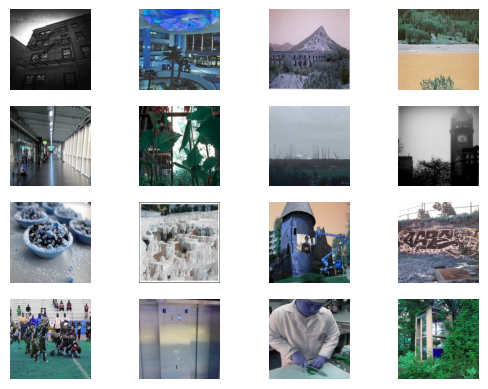

In [ ]:
import torch
import matplotlib.pyplot as plt
# exploringg some data
z = next(iter(train_dataloader))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  # Permute back to (H, W, C) for plotting with matplotlib
  plt.imshow(z[2][i].permute(1, 2, 0).detach().numpy().astype('uint8')) # Convert to uint8 for imshow

In [ ]:
len(train_dataloader) * 16 # should 17k something

5120

# Defining Denoiser and Ensembler models

In [12]:
# the ensemble model --- PLAIN ONE
import torch
from torch import nn

class EnsembleModel(nn.Module):
  """
  This model will combine the output MAT and LAMA which will be saved in the model folder
  """
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, 3, 1, 1),
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(3, 32, 3, 1, 1),
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),
        # nn.MaxPool2d(2),
    )

    self.in_conv3 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),

        nn.ConvTranspose2d(64, 32, 3, 1, 1),   # dependednt on output of concatenation
        nn.LeakyReLU(),

        nn.ConvTranspose2d(32, 3, 3, 1, 1),   # dependednt on output of concatenation
        nn.Sigmoid(), # Added Sigmoid to constrain output to [0, 1]
    )


  def forward(self, img1, img2):
    x = self.conv1(img1)
    y = self.conv2(img2)
    z = torch.cat((x, y), dim=1)
    z = self.conv3(z)
    z = self.in_conv3(z)
    return z

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvDenoiser(nn.Module):
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 1 --> 32), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # conv layer (depth from 32 --> 16), 3x3 kernels
        self.conv2 = nn.Conv2d(32, 16, 3, padding=1)
        # conv layer (depth from 16 --> 8), 3x3 kernels
        self.conv3 = nn.Conv2d(16, 8, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        # self.pool = nn.MaxPool2d(2, 2)

        ## decoder layers ##
        # transpose layer, a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        # self.t_conv1 = nn.ConvTranspose2d(8, 8, 3, stride=2)  # kernel_size=3 to get to a 7x7 image output
        # two more transpose layers with a kernel of 2
        self.t_conv2 = nn.ConvTranspose2d(8, 16, 3, stride=1)
        self.t_conv3 = nn.ConvTranspose2d(16, 32, 3, stride=1)
        # one, final, normal conv layer to decrease the depth
        self.conv_out = nn.Conv2d(32, 3, 3, padding=1)


    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        # x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        # x = self.pool(x)
        # add third hidden layer
        x = F.relu(self.conv3(x))
        # x = self.pool(x)  # compressed representation

        ## decode ##
        # add transpose conv layers, with relu activation function
        # x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        # transpose again, output should have a sigmoid applied
        x = F.sigmoid(self.conv_out(x))

        return x

denoise = ConvDenoiser()

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvDenoiser(nn.Module):
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        ## encoder layers ##
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Conv layer (3 --> 32 channels)
        self.conv2 = nn.Conv2d(32, 16, 3, padding=1)  # Conv layer (32 --> 16 channels)
        self.conv3 = nn.Conv2d(16, 8, 3, padding=1)  # Conv layer (16 --> 8 channels)

        ## decoder layers ##
        # Transpose layers to upsample back to the original input size
        self.t_conv1 = nn.ConvTranspose2d(8, 16, 3, padding=1)  # upsample by stride 1, no change in spatial dim
        self.t_conv2 = nn.ConvTranspose2d(16, 32, 3, padding=1)  # upsample by stride 1, no change in spatial dim
        self.t_conv3 = nn.ConvTranspose2d(32, 3, 3, padding=1)  # Output back to 3 channels

    def forward(self, x):
        ## encode ##
        x = F.leaky_relu(self.conv1(x))  # First conv layer
        x = F.leaky_relu(self.conv2(x))  # Second conv layer
        x = F.leaky_relu(self.conv3(x))  # Third conv layer

        ## decode ##
        x = F.leaky_relu(self.t_conv1(x))  # First transpose conv
        x = F.leaky_relu(self.t_conv2(x))  # Second transpose conv
        x = torch.sigmoid(self.t_conv3(x))  # Output layer with sigmoid activation

        return x

# Instantiate the model
denoise = ConvDenoiser()


In [ ]:
from torchinfo import summary
import torch
# Create an input tensor with the correct dimensions
input_tensor = torch.randn(16, 3, 256, 256)

# Pass the input tensor to denoise()
out = denoise(input_tensor)
out.shape

torch.Size([16, 3, 256, 256])

# Defining Loss Function

In [14]:
# the loss function utility
import os
import torch
from collections import OrderedDict
from torch import nn as nn
from torchvision.models import vgg as vgg

class Registry():
    """
    The registry that provides name -> object mapping, to support third-party
    users' custom modules.

    To create a registry (e.g. a backbone registry):

    .. code-block:: python

        BACKBONE_REGISTRY = Registry('BACKBONE')

    To register an object:

    .. code-block:: python

        @BACKBONE_REGISTRY.register()
        class MyBackbone():
            ...

    Or:

    .. code-block:: python

        BACKBONE_REGISTRY.register(MyBackbone)
    """

    def __init__(self, name):
        """
        Args:
            name (str): the name of this registry
        """
        self._name = name
        self._obj_map = {}

    def _do_register(self, name, obj):
        assert (name not in self._obj_map), (f"An object named '{name}' was already registered "
                                             f"in '{self._name}' registry!")
        self._obj_map[name] = obj

    def register(self, obj=None):
        """
        Register the given object under the the name `obj.__name__`.
        Can be used as either a decorator or not.
        See docstring of this class for usage.
        """
        if obj is None:
            # used as a decorator
            def deco(func_or_class):
                name = func_or_class.__name__
                self._do_register(name, func_or_class)
                return func_or_class

            return deco

        # used as a function call
        name = obj.__name__
        self._do_register(name, obj)

    def get(self, name):
        ret = self._obj_map.get(name)
        if ret is None:
            raise KeyError(f"No object named '{name}' found in '{self._name}' registry!")
        return ret

    def __contains__(self, name):
        return name in self._obj_map

    def __iter__(self):
        return iter(self._obj_map.items())

    def keys(self):
        return self._obj_map.keys()


DATASET_REGISTRY = Registry('dataset')
ARCH_REGISTRY = Registry('arch')
MODEL_REGISTRY = Registry('model')
LOSS_REGISTRY = Registry('loss')
METRIC_REGISTRY = Registry('metric')

VGG_PRETRAIN_PATH = 'experiments/pretrained_models/vgg19-dcbb9e9d.pth'
NAMES = {
    'vgg11': [
        'conv1_1', 'relu1_1', 'pool1', 'conv2_1', 'relu2_1', 'pool2', 'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2',
        'pool3', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'pool4', 'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2',
        'pool5'
    ],
    'vgg13': [
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'pool3', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'pool5'
    ],
    'vgg16': [
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'pool3', 'conv4_1', 'relu4_1', 'conv4_2',
        'relu4_2', 'conv4_3', 'relu4_3', 'pool4', 'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3', 'relu5_3',
        'pool5'
    ],
    'vgg19': [
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'conv3_4', 'relu3_4', 'pool3', 'conv4_1',
        'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3', 'relu4_3', 'conv4_4', 'relu4_4', 'pool4', 'conv5_1', 'relu5_1',
        'conv5_2', 'relu5_2', 'conv5_3', 'relu5_3', 'conv5_4', 'relu5_4', 'pool5'
    ]
}


def insert_bn(names):
    """Insert bn layer after each conv.

    Args:
        names (list): The list of layer names.

    Returns:
        list: The list of layer names with bn layers.
    """
    names_bn = []
    for name in names:
        names_bn.append(name)
        if 'conv' in name:
            position = name.replace('conv', '')
            names_bn.append('bn' + position)
    return names_bn


@ARCH_REGISTRY.register()
class VGGFeatureExtractor(nn.Module):
    """VGG network for feature extraction.

    In this implementation, we allow users to choose whether use normalization
    in the input feature and the type of vgg network. Note that the pretrained
    path must fit the vgg type.

    Args:
        layer_name_list (list[str]): Forward function returns the corresponding
            features according to the layer_name_list.
            Example: {'relu1_1', 'relu2_1', 'relu3_1'}.
        vgg_type (str): Set the type of vgg network. Default: 'vgg19'.
        use_input_norm (bool): If True, normalize the input image. Importantly,
            the input feature must in the range [0, 1]. Default: True.
        range_norm (bool): If True, norm images with range [-1, 1] to [0, 1].
            Default: False.
        requires_grad (bool): If true, the parameters of VGG network will be
            optimized. Default: False.
        remove_pooling (bool): If true, the max pooling operations in VGG net
            will be removed. Default: False.
        pooling_stride (int): The stride of max pooling operation. Default: 2.
    """

    def __init__(self,
                 layer_name_list,
                 vgg_type='vgg19',
                 use_input_norm=True,
                 range_norm=False,
                 requires_grad=False,
                 remove_pooling=False,
                 pooling_stride=2):
        super(VGGFeatureExtractor, self).__init__()

        self.layer_name_list = layer_name_list
        self.use_input_norm = use_input_norm
        self.range_norm = range_norm

        self.names = NAMES[vgg_type.replace('_bn', '')]
        if 'bn' in vgg_type:
            self.names = insert_bn(self.names)

        # only borrow layers that will be used to avoid unused params
        max_idx = 0
        for v in layer_name_list:
            idx = self.names.index(v)
            if idx > max_idx:
                max_idx = idx

        if os.path.exists(VGG_PRETRAIN_PATH):
            vgg_net = getattr(vgg, vgg_type)(pretrained=False)
            state_dict = torch.load(VGG_PRETRAIN_PATH, map_location=lambda storage, loc: storage)
            vgg_net.load_state_dict(state_dict)
        else:
            vgg_net = getattr(vgg, vgg_type)(pretrained=True)

        features = vgg_net.features[:max_idx + 1]

        modified_net = OrderedDict()
        for k, v in zip(self.names, features):
            if 'pool' in k:
                # if remove_pooling is true, pooling operation will be removed
                if remove_pooling:
                    continue
                else:
                    # in some cases, we may want to change the default stride
                    modified_net[k] = nn.MaxPool2d(kernel_size=2, stride=pooling_stride)
            else:
                modified_net[k] = v

        self.vgg_net = nn.Sequential(modified_net).to(device)

        if not requires_grad:
            self.vgg_net.eval()
            for param in self.parameters():
                param.requires_grad = False
        else:
            self.vgg_net.train()
            for param in self.parameters():
                param.requires_grad = True

        if self.use_input_norm:
            # the mean is for image with range [0, 1]
            self.register_buffer('mean', torch.Tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device))
            # the std is for image with range [0, 1]
            self.register_buffer('std', torch.Tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device))

    def forward(self, x):
        """Forward function.

        Args:
            x (Tensor): Input tensor with shape (n, c, h, w).

        Returns:
            Tensor: Forward results.
        """
        if self.range_norm:
            x = (x + 1) / 2
        if self.use_input_norm:
            x = (x - self.mean) / self.std
        output = {}

        for key, layer in self.vgg_net._modules.items():
            x = layer(x)
            if key in self.layer_name_list:
                output[key] = x.clone()

        return output

In [15]:
# actual loss function
import torch.nn.functional as F

class StyleLoss(nn.Module):

    def __init__(self):
        super(StyleLoss, self).__init__()

    def gram_matrix(self,input):
      a, b, c, d = input.size()  # a=batch size(=1)
      # b=number of feature maps
      # (c,d)=dimensions of a f. map (N=c*d)

      features = input.contiguous().view(a * b, c * d)  # resize F_XL into \hat F_XL

      G = torch.mm(features, features.t())  # compute the gram product

      # we 'normalize' the values of the gram matrix
      # by dividing by the number of element in each feature maps.
      return G.div(a * b * c * d)

    def forward(self, input, target1):
        G = self.gram_matrix(input)
        target = self.gram_matrix(target1).detach()
        self.loss = F.mse_loss(G, target)
        return self.loss

class PerceptualLoss(nn.Module):
    """Perceptual loss with commonly used style loss.

    Args:
        layer_weights (dict): The weight for each layer of vgg feature.
            Here is an example: {'conv5_4': 1.}, which means the conv5_4
            feature layer (before relu5_4) will be extracted with weight
            1.0 in calculting losses.
        vgg_type (str): The type of vgg network used as feature extractor.
            Default: 'vgg19'.
        use_input_norm (bool):  If True, normalize the input image in vgg.
            Default: True.
        range_norm (bool): If True, norm images with range [-1, 1] to [0, 1].
            Default: False.
      """

    def __init__(self,
                 layer_weights = {'conv1_2': 1, 'conv2_2': 1,'conv3_4': 1,'conv4_4': 1},
                 vgg_type='vgg19',
                 use_input_norm=True,
                 range_norm=True):
        super(PerceptualLoss, self).__init__()
        self.layer_weights = layer_weights
        self.vgg = VGGFeatureExtractor(
            layer_name_list=list(self.layer_weights.keys()),
            vgg_type=vgg_type,
            use_input_norm=use_input_norm,
            range_norm=range_norm)

        self.criterion = torch.nn.L1Loss()

    def forward(self, x, gt):
        """Forward function.

        Args:
            x (Tensor): Input tensor with shape (n, c, h, w).
            gt (Tensor): Ground-truth tensor with shape (n, c, h, w).

        Returns:
            Tensor: Forward results.
        """
        # extract vgg features
        x_features = self.vgg(x)
        gt_features = self.vgg(gt.detach())

        # calculate perceptual loss
        percep_loss = 0
        for k in x_features.keys():
            percep_loss += self.criterion(x_features[k], gt_features[k]) * self.layer_weights[k]

        return percep_loss


# def l1_loss():   -> take direct from premade
#   pass

class EdgeLoss(nn.Module):
    def __init__(self, reduction='mean'):
        super(EdgeLoss, self).__init__()
        k = torch.Tensor([[.05, .25, .4, .25, .05]])
        self.kernel = torch.matmul(k.t(),k).unsqueeze(0).repeat(3,1,1,1).to(device)

    def conv_gauss(self, img):
        n_channels, _, kw, kh = self.kernel.shape
        img = F.pad(img, (kw//2, kh//2, kw//2, kh//2), mode='replicate')
        return F.conv2d(img, self.kernel, groups=n_channels)

    def laplacian_kernel(self, current):
        filtered    = self.conv_gauss(current)
        down        = filtered[:,:,::2,::2]
        new_filter  = torch.zeros_like(filtered)
        new_filter[:,:,::2,::2] = down*4
        filtered    = self.conv_gauss(new_filter)
        diff = current - filtered
        return diff

    def forward(self, x, y):
        loss = F.mse_loss(self.laplacian_kernel(x), self.laplacian_kernel(y))
        return loss

class CombinedLoss(nn.Module):
    def __init__(self, device = "cpu"):
        super(CombinedLoss, self).__init__()
        self.edge_loss = EdgeLoss().to(device)
        self.mse_loss = nn.MSELoss().to(device)  # l1 loss
        self.style_loss = StyleLoss().to(device)
        self.perceptual_loss = PerceptualLoss().to(device)

    def forward(self, gen_img, gt_img):
        gen_img.to(device)
        gt_img.to(device)
        edge_loss_value = self.edge_loss(gen_img, gt_img)
        mse_loss_value = self.mse_loss(gen_img, gt_img)
        style_loss_value = self.style_loss(gen_img, gt_img)
        perceptual_loss_value = self.perceptual_loss(gen_img, gt_img)
        total_loss = edge_loss_value + mse_loss_value + style_loss_value + perceptual_loss_value
        return total_loss


In [ ]:
import torch
from torch import nn

# Assuming CombinedLoss is already defined and imported

# Initialize loss function and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tp_loss_fn = CombinedLoss(device=device).to(device)

# Create random images
# shape: (batch_size, channels, height, width)
gen_img = torch.rand((2, 3, 128, 128), device=device)  # fake generated image
gt_img = torch.rand((2, 3, 128, 128), device=device)   # fake ground truth

# Compute loss
loss = tp_loss_fn(gen_img, gt_img)

# Print output
print("Loss value:", loss.item())
print("Is finite?", torch.isfinite(loss))


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


 87%|████████▋ | 479M/548M [00:06<00:00, 110MB/s] 

# Training the denoising model

In [ ]:
# initialize the NN
denoising_model = ConvDenoiser()
criterion = nn.MSELoss() # as for the denoiser MSE loss is better
device = "cuda" if torch.cuda.is_available() else "cpu"

# specify loss function
# denoising_optimizer = torch.optim.Adam(denoising_model.parameters(), lr=0.001) #### EARLIER OPTIMIZER

In [ ]:
from torch_adabob.ljp.optimizers.adabob import AdaBoB

denoising_adbob_optimizer = AdaBoB(denoising_model.parameters(),
                 lr=0.001,
                 betas=(0.9, 0.999),
                 final_lr=0.1,
                 gamma=1e-3)



In [ ]:
# actual training
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

NUM_EPOCHS = 5

denoising_model.to(device)

print(type(denoising_model))
for epoch in tqdm(range(NUM_EPOCHS)):
  train_loss = 0
  denoising_model.train()
  for num,(img, lama, mat) in tqdm(enumerate(train_dataloader)):
    img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

    pred = denoising_model(lama)

    loss = criterion(pred, img/255.0)  # for RGB color space
    train_loss += loss.item()

    denoising_adbob_optimizer.zero_grad()
    loss.backward()
    denoising_adbob_optimizer.step()

  test_loss = 0
  denoising_model.eval()
  with torch.inference_mode():
    for num ,(img, lama, mat) in tqdm(enumerate(test_dataloader)):
      img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

      pred = denoising_model(lama)
      loss = criterion(pred, img/255.0)

      test_loss += loss.item()

  test_loss /= len(test_dataloader)
  train_loss /= len(train_dataloader)

  if epoch%1 == 0:
    torch.save(denoising_model, f"denoising_model_epoch_{epoch}.pth")
    print(f'\nepoch : {epoch} || train loss : {train_loss} || test loss : {test_loss}')

<class '__main__.ConvDenoiser'>


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 0 || train loss : 0.03561772210523486 || test loss : 0.026698489285951112


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 1 || train loss : 0.015198168955976143 || test loss : 0.01805521636168017


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 2 || train loss : 0.012429846145096235 || test loss : 0.014801756567219748


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 3 || train loss : 0.011788174339744727 || test loss : 0.010840106425793285


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 4 || train loss : 0.011640787008218467 || test loss : 0.010543305858507426


In [ ]:
torch.save(denoising_model,'final_adbob_lama_denoiser_20_each_model.pth')

# training the denoising model on output of ensembler


In [16]:
# training hyperparams
from torch.optim import Adam
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# model = EnsembleModel()
# model = torch.load("best_unet_with_denois.pth").to(device)
# model.to(device)

# denoising_model_lama = denoising_model
# denoising_model = ConvDenoiser()

model = torch.load("best_adbob_unet_with_lama_denois_20_each_neww.pth", weights_only=False)
denoising_model = torch.load('final_best_denoising_model_for_final_20_each.pth', weights_only=False)
denoising_model_lama = torch.load("final_adbob_lama_denoiser_20_each_model.pth", weights_only=False)


# denoising_model_lama = torch.load("denoising_model_good.pth")

loss_fn = nn.MSELoss()

# denoising_optimizer = torch.optim.Adam(denoising_model.parameters(), lr=0.001) ### EARLIER

In [17]:
from torch_adabob.ljp.optimizers.adabob import AdaBoB

denoising_adbob_optimizer = AdaBoB(denoising_model.parameters(),
                 lr=0.001,
                 betas=(0.9, 0.999),
                 final_lr=0.1,
                 gamma=1e-3)

In [ ]:
# actual training
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

NUM_EPOCHS = 5

model.to(device)
denoising_model.to(device)
denoising_model_lama.to(device)

model.eval()
denoising_model_lama.eval()

print(type(denoising_model))
for epoch in tqdm(range(NUM_EPOCHS)):
  train_loss = 0
  denoising_model.train()
  for num,(img, lama, mat) in tqdm(enumerate(train_dataloader)):
    img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

    pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))

    loss = loss_fn(pred, img/255.0)  # for RGB color space
    train_loss += loss.item()

    denoising_adbob_optimizer.zero_grad()
    loss.backward()
    denoising_adbob_optimizer.step()

  test_loss = 0
  denoising_model.eval()
  with torch.inference_mode():
    for num ,(img, lama, mat) in tqdm(enumerate(test_dataloader)):
      img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

      pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))
      loss = loss_fn(pred, img/255.0)

      test_loss += loss.item()

  test_loss /= len(test_dataloader)
  train_loss /= len(train_dataloader)

  if epoch%1 == 0:
    torch.save(denoising_model, f"model_epoch_{epoch}.pth")
    print(f'\nepoch : {epoch} || train loss : {train_loss} || test loss : {test_loss}')

<class '__main__.ConvDenoiser'>


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 0 || train loss : 0.01876966627605725 || test loss : 0.009642418405979219


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 1 || train loss : 0.009377324339584447 || test loss : 0.008897900839682914


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 2 || train loss : 0.008888648902939167 || test loss : 0.008434434829238993


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 3 || train loss : 0.0079515832971083 || test loss : 0.006474146718009763


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 4 || train loss : 0.0045635467780812174 || test loss : 0.0038302707125561952


In [ ]:
torch.save(denoising_model, 'final_best_denoising_model_for_final_20_each.pth') #epoch : 4 || train loss : 32.621086430549624 || test loss : 36.331669563794655

In [18]:
# actual training
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

NUM_EPOCHS = 10

model.to(device)
denoising_model.to(device)
denoising_model_lama.to(device)

model.eval()
denoising_model_lama.eval()

print(type(denoising_model))
for epoch in tqdm(range(NUM_EPOCHS)):
  train_loss = 0
  denoising_model.train()
  for num,(img, lama, mat) in tqdm(enumerate(train_dataloader)):
    img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

    pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))

    loss = loss_fn(pred, img/255.0)  # for RGB color space
    train_loss += loss.item()

    denoising_adbob_optimizer.zero_grad()
    loss.backward()
    denoising_adbob_optimizer.step()

  test_loss = 0
  denoising_model.eval()
  with torch.inference_mode():
    for num ,(img, lama, mat) in tqdm(enumerate(test_dataloader)):
      img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

      pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))
      loss = loss_fn(pred, img/255.0)

      test_loss += loss.item()

  test_loss /= len(test_dataloader)
  train_loss /= len(train_dataloader)

  if epoch%1 == 0:
    torch.save(denoising_model, f"model_epoch_{epoch}.pth")
    print(f'\nepoch : {epoch} || train loss : {train_loss} || test loss : {test_loss}')

<class '__main__.ConvDenoiser'>


  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 0 || train loss : 0.004860268397897017 || test loss : 0.003785161537723276


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 1 || train loss : 0.0036054976713785435 || test loss : 0.003626955484454758


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 2 || train loss : 0.0034710504376562314 || test loss : 0.003506293979194695


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 3 || train loss : 0.003360606904607266 || test loss : 0.003392401695197081


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 4 || train loss : 0.003263298494857736 || test loss : 0.003327726442570778


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 5 || train loss : 0.0031583673000568522 || test loss : 0.003178928869973569


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 6 || train loss : 0.0030636387979029677 || test loss : 0.0031467026905122684


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 7 || train loss : 0.0029625765113451053 || test loss : 0.0029743750499778964


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 8 || train loss : 0.002854284158456721 || test loss : 0.002930668962738701


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 9 || train loss : 0.002774914284236729 || test loss : 0.0027783060069093957


In [19]:
torch.save(denoising_model, 'final_best_denoising_model_for_final_20_each_15_epochs.pth') #epoch : 4 || train loss : 32.621086430549624 || test loss : 36.331669563794655

In [20]:
from google.colab import files

files.download('final_best_denoising_model_for_final_20_each_15_epochs.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# actual training
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

NUM_EPOCHS = 10

model.to(device)
denoising_model.to(device)
denoising_model_lama.to(device)

model.eval()
denoising_model_lama.eval()

print(type(denoising_model))
for epoch in tqdm(range(NUM_EPOCHS)):
  train_loss = 0
  denoising_model.train()
  for num,(img, lama, mat) in tqdm(enumerate(train_dataloader)):
    img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

    pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))

    loss = loss_fn(pred, img/255.0)  # for RGB color space
    train_loss += loss.item()

    denoising_adbob_optimizer.zero_grad()
    loss.backward()
    denoising_adbob_optimizer.step()

  test_loss = 0
  denoising_model.eval()
  with torch.inference_mode():
    for num ,(img, lama, mat) in tqdm(enumerate(test_dataloader)):
      img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

      pred = denoising_model(model(denoising_model_lama(lama), mat/255.0))
      loss = loss_fn(pred, img/255.0)

      test_loss += loss.item()

  test_loss /= len(test_dataloader)
  train_loss /= len(train_dataloader)

  if epoch%1 == 0:
    torch.save(denoising_model, f"model_epoch_{epoch}.pth")
    print(f'\nepoch : {epoch} || train loss : {train_loss} || test loss : {test_loss}')

<class '__main__.ConvDenoiser'>


  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 0 || train loss : 0.002662336750654504 || test loss : 0.002706487304497048


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 1 || train loss : 0.0025674452794191894 || test loss : 0.0025678585176390125


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 2 || train loss : 0.002453209577288362 || test loss : 0.0024724535705236187


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 3 || train loss : 0.002339143504286767 || test loss : 0.0023430424672721403


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 4 || train loss : 0.00220244437623478 || test loss : 0.002274746902926016


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 5 || train loss : 0.002034814043508959 || test loss : 0.002021217225017502


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 6 || train loss : 0.0018811845409800298 || test loss : 0.0018218559549482416


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 7 || train loss : 0.00173968678136589 || test loss : 0.0017624122488319222


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 8 || train loss : 0.0016749451886425959 || test loss : 0.001669964423389548


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 9 || train loss : 0.0016365479968953878 || test loss : 0.0016056606698998787


In [22]:
torch.save(denoising_model, 'final_best_denoising_model_for_final_20_each_25_epochs.pth') #epoch : 4 || train loss : 32.621086430549624 || test loss : 36.331669563794655

# Training the ensemble model

In [ ]:
# training hyperparams
# OPTIMZER AND OTHER SETTINGS FOR TRAINING
from torch.optim import Adam
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = CombinedLoss(device = device).to(device)

model = EnsembleModel()
model.to(device)

# optimizer = Adam(model.parameters(), lr=1e-4) # EARLIER

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EnsembleModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (in_conv3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

In [ ]:
denoising_model = torch.load('/content/final_adbob_lama_denoiser_20_each_model.pth', weights_only=False)

In [ ]:
from torch_adabob.ljp.optimizers.adabob import AdaBoB

adbob_optimizer = AdaBoB(model.parameters(),
                 lr=0.0001)

In [ ]:
# actual training
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm

NUM_EPOCHS = 10

model.to(device)
denoising_model.to(device)

denoising_model.eval()
print(type(model))
for epoch in tqdm(range(NUM_EPOCHS)):
  train_loss = 0
  model.train()
  for num,(img, lama, mat) in tqdm(enumerate(train_dataloader)):
    img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

    pred = model(denoising_model(lama), mat/255.0)

    loss = loss_fn(pred, img/255.0)  # for RGB color space
    train_loss += loss.item()

    adbob_optimizer.zero_grad()
    loss.backward()
    adbob_optimizer.step()

  test_loss = 0
  model.eval()
  with torch.inference_mode():
    for num ,(img, lama, mat) in tqdm(enumerate(test_dataloader)):
      img, lama, mat =  img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

      pred = model(denoising_model(lama), mat/255.0)
      loss = loss_fn(pred, img/255.0)

      test_loss += loss.item()

  test_loss /= len(test_dataloader)
  train_loss /= len(train_dataloader)

  if epoch%1 == 0:
    torch.save(model, f"model_epoch_{epoch}.pth")
    print(f'\nepoch : {epoch} || train loss : {train_loss} || test loss : {test_loss}')
    #epoch : 4 || train loss : 304.2973921775818 || test loss : 273.30257599545223

<class '__main__.EnsembleModel'>


  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 0 || train loss : 1.92630376778543 || test loss : 1.6052388814243956


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 1 || train loss : 1.5720438200980424 || test loss : 1.730517225543948


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 2 || train loss : 1.5189804073423148 || test loss : 2.0916792719903654


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 3 || train loss : 1.4897228319197893 || test loss : 1.5498455075451927


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 4 || train loss : 1.4115441981703043 || test loss : 1.3048444707898328


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 5 || train loss : 1.3646487828344107 || test loss : 1.3823751559222701


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 6 || train loss : 1.4250552743673324 || test loss : 1.252988104402584


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 7 || train loss : 1.3229054786264896 || test loss : 1.4542119929390231


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 8 || train loss : 1.3877976652234794 || test loss : 1.0867056254922909


0it [00:00, ?it/s]

0it [00:00, ?it/s]


epoch : 9 || train loss : 1.3118838157504797 || test loss : 1.70802332972088


In [ ]:
torch.save(model, 'best_adbob_unet_with_lama_denois_20_each_neww.pth')

In [ ]:
from google.colab import files

files.download('best_adbob_unet_with_lama_denois_20_each_neww.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
img

tensor([[[[223.,  75.,  85.,  ..., 140., 146., 161.],
          [225., 184.,  68.,  ..., 130., 134., 148.],
          [235., 251., 123.,  ..., 128., 131., 142.],
          ...,
          [ 33.,  54.,  66.,  ..., 213., 239., 234.],
          [ 44.,  63.,  72.,  ..., 204., 232., 232.],
          [ 59.,  66.,  64.,  ..., 211., 213., 243.]],

         [[221.,  75.,  91.,  ..., 145., 150., 165.],
          [221., 184.,  72.,  ..., 135., 138., 152.],
          [229., 250., 128.,  ..., 133., 135., 146.],
          ...,
          [ 69.,  90., 104.,  ..., 225., 253., 248.],
          [ 81., 100., 110.,  ..., 215., 242., 244.],
          [ 96., 103., 102.,  ..., 221., 223., 253.]],

         [[227.,  81.,  98.,  ..., 148., 151., 166.],
          [227., 190.,  77.,  ..., 138., 139., 153.],
          [234., 254., 131.,  ..., 136., 136., 147.],
          ...,
          [105., 126., 139.,  ..., 235., 255., 255.],
          [115., 134., 145.,  ..., 223., 252., 254.],
          [130., 137., 137.,  ...

In [ ]:
loss

tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
print("img min/max:", img.min(), img.max())
print("lama min/max:", lama.min(), lama.max())
print("mat min/max:", mat.min(), mat.max())


img min/max: tensor(0., device='cuda:0') tensor(255., device='cuda:0')
lama min/max: tensor(0., device='cuda:0') tensor(255., device='cuda:0')
mat min/max: tensor(0., device='cuda:0') tensor(255., device='cuda:0')


In [ ]:
pred = model(denoising_model(lama)/255.0, mat/255.0)
print("pred min/max:", pred.min(), pred.max())
print("any nan in pred:", torch.isnan(pred).any())


pred min/max: tensor(0.4710, device='cuda:0', grad_fn=<MinBackward1>) tensor(0.5584, device='cuda:0', grad_fn=<MaxBackward1>)
any nan in pred: tensor(False, device='cuda:0')


In [ ]:
pred, img

(tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1

# Saving the trained models

In [ ]:
torch.save(model, 'best_adbob_unet_with_lama_denois_20_each_10epochs.pth')

In [ ]:
torch.save(denoising_model, 'denoising_model_good.pth')

# checking


torch.Size([16, 3, 256, 256])


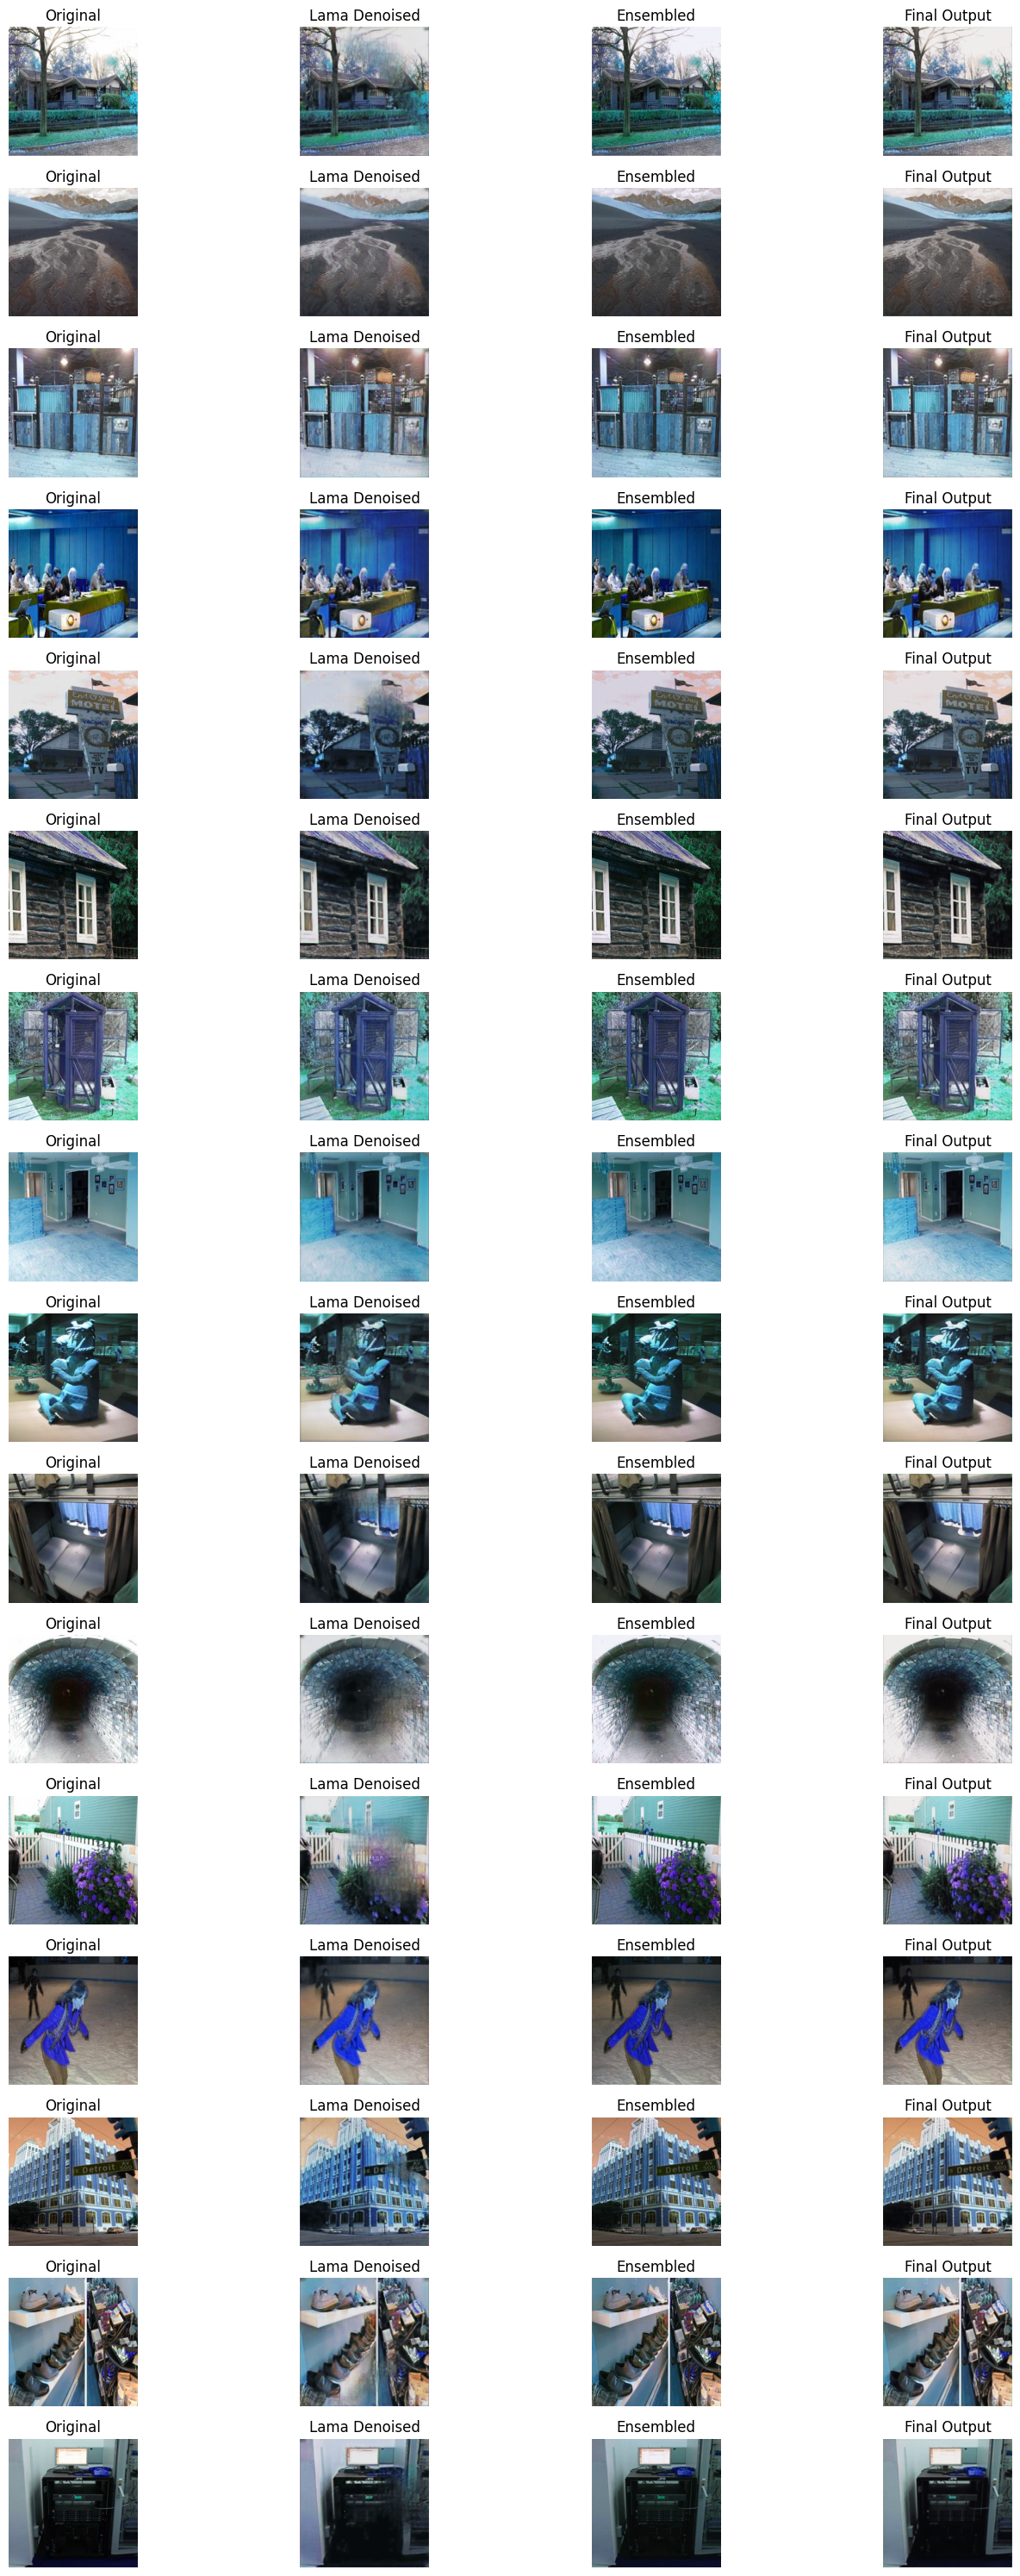

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch from the test dataloader
dataiter = iter(test_dataloader)
img, lama, mat = next(dataiter)

# Move data to the device
img, lama, mat = img.to(torch.float).to(device), lama.to(torch.float).to(device), mat.to(torch.float).to(device)

# Ensure models are in evaluation mode
model.eval()
denoising_model.eval()
denoising_model_lama.eval()

# Pass through models
with torch.no_grad():
    lama_denoised_img = denoising_model_lama(lama)
    ensembled_img = model(lama_denoised_img, mat / 255.0)
    final_output = denoising_model(ensembled_img)

print(lama_denoised_img.shape)

# Detach tensors, move to CPU, and convert to numpy for plotting
img = img.cpu().detach().permute(0, 2, 3, 1).numpy()
lama_denoised_img = lama_denoised_img.cpu().detach().permute(0, 2, 3, 1).numpy()
ensembled_img = ensembled_img.cpu().detach().permute(0, 2, 3, 1).numpy()
final_output = final_output.cpu().detach().permute(0, 2, 3, 1).numpy()

img = img / 255.0

# Plot the images
fig, axes = plt.subplots(len(img), 4, figsize=(15, 30))

for i in range(len(img)):
    axes[i, 0].imshow(img[i])
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(lama_denoised_img[i])
    axes[i, 1].set_title("Lama Denoised")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(ensembled_img[i])
    axes[i, 2].set_title("Ensembled")
    axes[i, 2].axis("off")

    axes[i, 3].imshow(final_output[i])
    axes[i, 3].set_title("Final Output")
    axes[i, 3].axis("off")

plt.tight_layout()
plt.show()

In [29]:
img.shape, lama_denoised_img.shape

((16, 256, 256, 3), (16, 256, 256, 3))